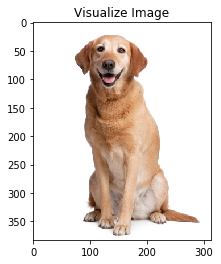

(383, 313, 3)
Height = 383 pixels
Width = 313 pixels
Resolution = 119879 pixels
Total Pixels in image = 359637


In [8]:
#Part 1 - Basic Image Loading and Manipulation
import cv2
import numpy as np
import matplotlib.pyplot as plt
dog = cv2.imread('./images/dog.jpg')
'''Convert OpenCV (B,G,R) imread to matplotlib (R,G,B)'''
b,g,r = cv2.split(dog)
dog = cv2.merge([r,g,b])
plt.imshow(dog)
plt.title("Visualize Image")
plt.show()

#Info about image
print(dog.shape)
print("Height = " + str(dog.shape[0]) + ' pixels')
print("Width = " + str(dog.shape[1]) + ' pixels')
print("Resolution = " + str(dog.shape[0] * dog.shape[1]) + ' pixels')
print("Total Pixels in image = " + str(dog.shape[0]*dog.shape[1]*dog.shape[2]))


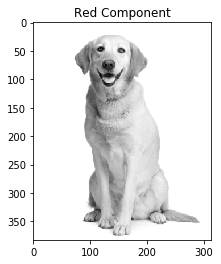

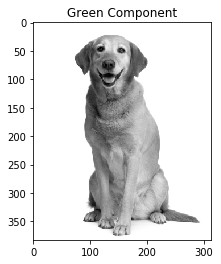

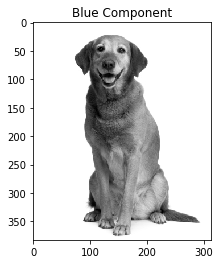

In [24]:
#Visualize R,G,B components of image
filler = np.zeros((383,313), np.uint8)
Red, Green, Blue = cv2.split(dog)
plt.imshow(Red, cmap = "gray")
plt.title("Red Component")
plt.show()
plt.imshow(Green, cmap = "gray")
plt.title("Green Component")
plt.show()
plt.imshow(Blue, cmap = "gray")
plt.title("Blue Component")
plt.show()

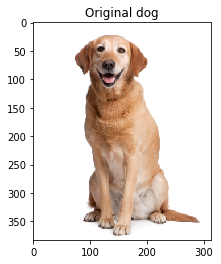

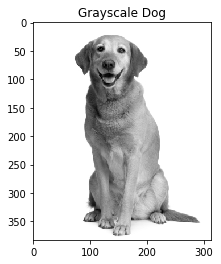

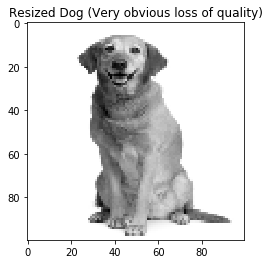

In [40]:
#Part 2 - Genetic Algorithm
'''
Trying to use genetic algorithms to convert a randomly generated grayscale
(100x100) image into the resized/grayscaled dog image from above.
'''
#Load Image, Transform to Grayscale, Resize
import cv2 
import numpy as np
import matplotlib.pyplot as plt
dog = cv2.imread('./images/dog.jpg')
#By Default OpenCV2 reads images as B,G,R
#Matplotlib reads reads images R,G,B
b,g,r = cv2.split(dog)
dog = cv2.merge([r,g,b])
plt.imshow(dog)
plt.title("Original dog")
plt.show()

#OpenCV function to convert dog to grayscale
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
plt.imshow(dog, cmap = 'gray')
plt.title("Grayscale Dog")
plt.show()

dog = cv2.resize(dog, (100, 100))
plt.imshow(dog, cmap='gray')
plt.title("Resized Dog (Very obvious loss of quality)")
plt.show()

(100, 100)


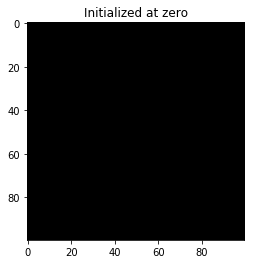

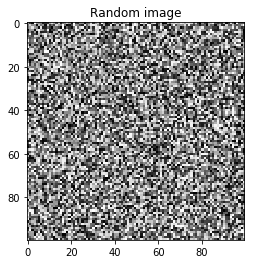

In [2]:
#Generate Random Image (Milestone 2)
GenerationX = np.zeros((100, 100), np.uint8)
print(GenerationX.shape)
plt.imshow(GenerationX, cmap = 'gray')
plt.title("Initialized at zero")
plt.show()
for i in range(0,100):
    for j in range(0,100):
        GenerationX[i][j] = np.random.randint(0,255)
plt.imshow(GenerationX, cmap = 'gray')
plt.title("Random image")
plt.show()

Mut1 sample 0: Distance from Target
1086303
Mut1 sample 1: Distance from Target
1089574
Mut1 sample 2: Distance from Target
1093055
Mut1 sample 3: Distance from Target
1097130
Mut1 sample 4: Distance from Target
1101302
Mut1 sample 5: Distance from Target
1104900
Mut2 sample 6: Distance from Target
1087886
Mut2 sample 7: Distance from Target
1091616
Mut2 sample 8: Distance from Target
1094894
Mut3 sample 9: Distance from Target
1089651
Mut1 sample 0: Distance from Target
1093129
Mut1 sample 1: Distance from Target
1096280
Mut1 sample 2: Distance from Target
1100106
Mut1 sample 3: Distance from Target
1103319
Mut1 sample 4: Distance from Target
1106830
Mut1 sample 5: Distance from Target
1110203
Mut2 sample 6: Distance from Target
1098420
Mut2 sample 7: Distance from Target
1102050
Mut2 sample 8: Distance from Target
1105892
Mut3 sample 9: Distance from Target
1108618
Mut1 sample 0: Distance from Target
1109641
Mut1 sample 1: Distance from Target
1112942
Mut1 sample 2: Distance from Tar

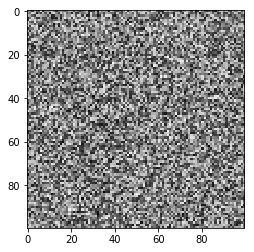

In [51]:
import operator
def computeDistance(target, X):
    total = 0
    for i in range(100):
        for j in range(100):
            total += abs(int(target[i][j])-int(X[i][j]))
    return total

def getMin3(target, generation):
    genMetrics = {}
    for i in range(10):
        distance = computeDistance(dog, generation[i])
        index = i
        genMetrics.update({distance: index})
    sortedMetrics = sorted(genMetrics.items(),key=operator.itemgetter(0))
    return(sortedMetrics[0][1], sortedMetrics[1][1], sortedMetrics[2][1])

def Selection(target, generation):
    indices = getMin3(target, generation)
    index1, index2, index3 = indices[0], indices[1], indices[2]
    return [generation[index1], generation[index2], generation[index3]]
def Mutate(target, top3):
    nextGen = []
    for i in range(6):
        Mut1 = top3[0]
        for x in range(100):
            for y in range(100):
                Mut1[x][y] += np.random.randint(-5,5)
        #TEST LINE
        print("Mut1 sample " + str(i) + ": Distance from Target")
        print(computeDistance(target, Mut1))
        nextGen.append(Mut1)

    for j in range(3):
        Mut2 = top3[1]
        for x in range(100):
            for y in range(100):
                Mut2[x][y] += np.random.randint(-5,5)
        #TEST LINE
        print("Mut2 sample " + str(6+j) + ": Distance from Target")
        print(computeDistance(target, Mut2))
        nextGen.append(Mut2)
    
    for k in range(1):
        Mut3 = top3[2]
        for x in range(100):
            for y in range(100):
                Mut3[x][y] += np.random.randint(-5,5)
        #TEST LINE
        print("Mut3 sample " + str(9+k) + ": Distance from Target")
        print(computeDistance(target, Mut3))
        nextGen.append(Mut3)
    
    return nextGen

def Initialize():
    generation = []
    for i in range(10):
        entry = np.zeros((100,100))
        for i in range(0, 100):
            for j in range(0, 100):
                entry[i][j] = np.random.randint(0, 255)
        generation.append(entry)
    return generation
        
def Evolve(target, X, iterations):
    for i in range(iterations):
        if (i == 0):
            nextGen = Initialize()
        parents = Selection(target, nextGen)
        nextGen = Mutate(dog, parents)
    parents = Selection(target, nextGen)
    return parents[0]

start = time.time()
Lebron = Evolve(dog, Generation0, 10)
end = time.time()
print("TIME TAKEN: " + str(end-start) + " Seconds")
print(computeDistance(dog, Lebron))
plt.imshow(Lebron, cmap = 'gray')
plt.show()
    
    